# Demonstração uso Redes Neurais Artificiais em Python

Para utilização de Redes Neurais em Python primeiramente é necessário instalar os seguintes pacotes em seu ambiente de desenvolvimento pelo gerenciador pip:

* Pandas

    - Leitura de dados e formação de tabelas e estruturação dos dados
    - **pip install pandas**
    
* Numpy

    - Manipulação de Vetores e Matrizes
    - **pip install numpy**

* Scikit-Learn
    - Modelos de Machine-Learning
    - **pip install -U scikit-learn**

* Matplotlib
    - Criação de gráficos
    - **pip install matplotlib**

In [1]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPRegressor
# Modelo de Rede Neural Multi-Layer Perceptron
# Avaliação da Acurácia do Modelo
from matplotlib import pyplot as plt

## Leitura dos Dados

Para abrir uma planilha Excel, utilizamos o método _read_excel_ da biblioteca Pandas. Como argumento, passamos o endereço do arquivo a ser lido (Ex: C://desktop//arquivo.txt). Os dados utilizados neste exemplo contemplam o histórico mensal de demandas dos últimos 15 anos.

In [2]:
dados = pd.read_excel('dados.xlsx')
dados

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
0,1997,2014,2113,2140,2215,2225,2224,2196,2256,2244,2256,2231
1,2246,2347,2357,2349,2438,2432,2429,2492,2464,2513,2491,2408
2,2449,2507,2546,2548,2579,2557,2600,2694,2700,2724,2695,2656
3,2624,2687,2758,2826,2820,2836,2840,2897,2947,2958,2904,2826
4,2834,2968,2922,2949,2965,2984,3051,3092,3171,3110,3083,3042
5,3047,3097,3190,3199,3256,3301,3260,3387,3453,3334,3261,3233
6,3268,3319,3291,3373,3410,3503,3509,3608,3559,3462,3469,3375
7,3391,3385,3382,3135,3298,3399,3442,3504,3493,3475,3395,3190
8,3194,3271,3451,3456,3497,3576,3608,3664,3655,3634,3551,3390
9,3391,3460,3454,3483,3560,3572,3591,3598,3555,3484,3426,3382


## Separação em dados de Treino e de Teste

Para o treino supervisionado da Rede Neural, precisamos separar o conjunto de dados em treinamento e teste. Neste cenário de Demandas, queremos utilizar a Rede Neural para a partir do histórico mensal dos últimos anos prever a demanda dos meses do próximo ano.

### Selecionando Dados

#### Conjunto de Treinamento

O conjunto de treinamento consiste nos conjuntos de entradas e resposta de saída que a Rede Neural utiliza para aprender o padrão. A cada iteração, a partir da entrada do conjunto de treinamento, a RNA produz uma saída que é comparada com a resposta informada pelas saídas do conjunto de treinamento em que o erro obtido é utilizado no ajuste dos pesos sinpáticos internos de sua estrutura da Rede Neural.

Queremos prever a demanda do próximo mês a partir de um histórico de dois meses anteriores, assim, o conjunto de entradas para o treinamento devem ser as demandas mensais [$M-2$,$M-1$]. Já o conjunto de respostas da saída, deve ser a demanda mensal conhecidas do mês $M$.

* $X_{Treino}$ = [ [$A_{1}M_{1}$, $A_{1}M_{2}$], [$A_{1}M_{1}$, $A_{1}M_{2}$], ... , [$A_{n}M_{(m-1)},A_{n}M_{(m)}]]
* $Y_{Treino}$ = [ [$A_{1}M_{3}$] , [$A_{1}M_{4}], ... , [A_{n}M_{(m+1)}]]

Sendo:

* $A_{x}$ : Ano x
* $M_{x}$ : Mês x

#### Conjunto de Teste

O conjunto de teste é utilizado para avaliar o desempenho da Rede Neural já treinada. e estes dados devem ser inéditos ao modelo.

O conjunto de treinamento utilizou como entrada os últimos 13 anos para o treinar a RNA, assim:

* $X_{Teste}$ = [ [$A_{15}M_{1}$, $A_{15}M_{2}$] ,[$A_{15}M_{2}$, $A_{15}M_{3}$], ... , [$A_{15}M_{11}$, $A_{15}M_{12}$] ]

Note que estes dados são inéditos para a RNA, pois não pertencem aos seus respectivos conjuntos de treinamento.

### Dividindo Grupos no Python

Para selecionar entre os dados da planilha o corte que queremos, utilizamos o método _iloc_ da classe _DataFrame_ da biblioteca pandas. 


_(Lembrete1: No Python a numeração começa do 0)_

_(Lembrete2: No Python quando fazemos um corte, o limite superior é ignorado)_

In [3]:
def ajusta_dados_treino(dados):
    data_x = []
    data_y = []

    for l in range(len(dados)-2):
        for c in range(len(dados.columns)-2):
            data_x.append([dados.iloc[l,c],dados.iloc[l,c+1]])
    
    for l in range(len(dados)-2):
        for c in range(len(dados.columns)-2):
            data_y.append([dados.iloc[l,c+2]])
    
    return data_x, data_y

def ajusta_dados_teste(dados):
    data_x = []
    data_y = []

    for c in range(len(dados.columns)-1):
        data_x.append([dados.iloc[0,c],dados.iloc[0,c+1]])
    
    for c in range(len(dados.columns)-2):
        data_y.append(dados.iloc[0,c+2])
    
    return data_x, data_y


In [4]:
#Exemplo = dataframe.iloc[lin_inicio:lin_fim , col_inicio: col_fim]
x_treino, y_treino = ajusta_dados_treino(dados.iloc[:14,:])
x_teste, y_teste = ajusta_dados_teste(dados.iloc[14:,:])

In [16]:
x_treino

[[1997, 2014],
 [2014, 2113],
 [2113, 2140],
 [2140, 2215],
 [2215, 2225],
 [2225, 2224],
 [2224, 2196],
 [2196, 2256],
 [2256, 2244],
 [2244, 2256],
 [2246, 2347],
 [2347, 2357],
 [2357, 2349],
 [2349, 2438],
 [2438, 2432],
 [2432, 2429],
 [2429, 2492],
 [2492, 2464],
 [2464, 2513],
 [2513, 2491],
 [2449, 2507],
 [2507, 2546],
 [2546, 2548],
 [2548, 2579],
 [2579, 2557],
 [2557, 2600],
 [2600, 2694],
 [2694, 2700],
 [2700, 2724],
 [2724, 2695],
 [2624, 2687],
 [2687, 2758],
 [2758, 2826],
 [2826, 2820],
 [2820, 2836],
 [2836, 2840],
 [2840, 2897],
 [2897, 2947],
 [2947, 2958],
 [2958, 2904],
 [2834, 2968],
 [2968, 2922],
 [2922, 2949],
 [2949, 2965],
 [2965, 2984],
 [2984, 3051],
 [3051, 3092],
 [3092, 3171],
 [3171, 3110],
 [3110, 3083],
 [3047, 3097],
 [3097, 3190],
 [3190, 3199],
 [3199, 3256],
 [3256, 3301],
 [3301, 3260],
 [3260, 3387],
 [3387, 3453],
 [3453, 3334],
 [3334, 3261],
 [3268, 3319],
 [3319, 3291],
 [3291, 3373],
 [3373, 3410],
 [3410, 3503],
 [3503, 3509],
 [3509, 36

In [6]:
y_treino

[[2113],
 [2140],
 [2215],
 [2225],
 [2224],
 [2196],
 [2256],
 [2244],
 [2256],
 [2231],
 [2357],
 [2349],
 [2438],
 [2432],
 [2429],
 [2492],
 [2464],
 [2513],
 [2491],
 [2408],
 [2546],
 [2548],
 [2579],
 [2557],
 [2600],
 [2694],
 [2700],
 [2724],
 [2695],
 [2656],
 [2758],
 [2826],
 [2820],
 [2836],
 [2840],
 [2897],
 [2947],
 [2958],
 [2904],
 [2826],
 [2922],
 [2949],
 [2965],
 [2984],
 [3051],
 [3092],
 [3171],
 [3110],
 [3083],
 [3042],
 [3190],
 [3199],
 [3256],
 [3301],
 [3260],
 [3387],
 [3453],
 [3334],
 [3261],
 [3233],
 [3291],
 [3373],
 [3410],
 [3503],
 [3509],
 [3608],
 [3559],
 [3462],
 [3469],
 [3375],
 [3382],
 [3135],
 [3298],
 [3399],
 [3442],
 [3504],
 [3493],
 [3475],
 [3395],
 [3190],
 [3451],
 [3456],
 [3497],
 [3576],
 [3608],
 [3664],
 [3655],
 [3634],
 [3551],
 [3390],
 [3454],
 [3483],
 [3560],
 [3572],
 [3591],
 [3598],
 [3555],
 [3484],
 [3426],
 [3382],
 [3630],
 [3566],
 [3665],
 [3675],
 [3759],
 [3748],
 [3777],
 [3696],
 [3574],
 [3483],
 [3554],
 

In [7]:
x_teste

[[4134, 4281],
 [4281, 4297],
 [4297, 4299],
 [4299, 4394],
 [4394, 4407],
 [4407, 4479],
 [4479, 4539],
 [4539, 4670],
 [4670, 4522],
 [4522, 4538],
 [4538, 4262]]

## Criando o modelo

### Construção da RNA

A biblioteca _Scikit-Learn_ possui diversas classes de modelos de aprendizados prontos que só precisam ser importados e instanciados, atribuindo valores para os hiperparâmetros que constituem o modelo.

Para a previsão de demanda, utilizaremos a Rede Neural Multi-Layer Perceptron em que os principais hiperparâmetros a serem instanciados são:

* Número de Neurônios na Camada Oculta : _hidden_layer_sizes_
* Função de Ativação: _activation_
* Método de Ajuste de Pesos: _solver_
* Número 
* Máximo de iterações: _max_iter_
* Tolerância do Erro: _tol_
* Número de Iterações sem melhora: _n_iter_no_change_

Mais hiperparametros e detalhes estão documentados no link : (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [8]:
RNA = MLPRegressor(
            hidden_layer_sizes= 5,
            activation='relu',
            solver='lbfgs',
            max_iter= 10000,
            tol=1e-8,
            verbose=True,
            n_iter_no_change=10,
        )

### Treinando o Modelo

Após instanciar os parâmetros construtores do modelo, precisamos realizar o treinamento. Para isso, basta utilizar o método _fit_ passando os valores dos conjuntos de treinamento.

In [9]:
model = RNA.fit(x_treino, y_treino)

/home/ufjf/projetos/GOHB_Estimator/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Avaliando o Modelo

### Realizando a Predição 

Como dito anteriormente, para avaliar a RNA já treinada precisamos fazer a predição com dados inéditos. Para realizar a predição, utilizamos o método _predict_ do modelo já treinado.

In [10]:
previsao = model.predict(x_teste)
previsao

array([4304.73765295, 4300.10670434, 4299.90191967, 4409.56648104,
       4409.65296184, 4490.95828904, 4549.07842698, 4691.28393769,
       4499.31364888, 4541.14785957, 4219.10809519])

### Dados de Balisa

Os dados de balisa constituem da resposta correta que deveria ser atingida pela previsão da RNA. Estes dados são utilizados para o cálculo de métricas de desempenho do modelo e também avaliar gráficamente o resultado obtido com o resultado esperado.
Assim,

* $Y_{Balisa}$ = [[$A_{15}M_{3}$], [$A_{15}M_{4}$], ... , [$A_{15}M_{12}$]]

In [11]:
y_teste 

[4297, 4299, 4394, 4407, 4479, 4539, 4670, 4522, 4538, 4262]

### Visualização dos dados

A fim de realizar uma análise visual, utilizamos os métodos da biblioteca _Matplotlib.pyplot_ para construção de gráfico.

##### Tratamento dos Dados

Para construção dos gráficos, devemos passar vetores com os valores a serem plotados. No entanto, para o treinamento da RNA e como padrão de saída do modelo temos um vetor de vetores.

Assim, devemos passar a posição do vetor que queremos plotar.

Outro problema é que quando usamos o método _iloc_, o tipo do objeto retornado não é um vetor e sim um _DataFrame_

Para corrigir o problema, devemos converter o objeto _real_ para um vetor, utilizando o método _array_ da biblioteca Numpy.

Como os vetores foram tratados e possuem o mesmo tipo, agora basta montar o plot com os métodos da classe _pyplot_ da biblioteca _Matplotlib_ e avaliar o modelo.

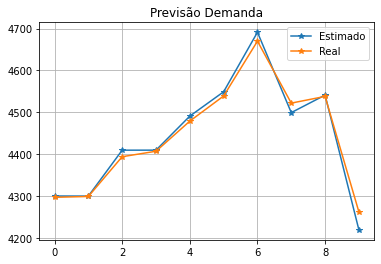

In [12]:
plt.title('Previsão Demanda')
plt.plot(previsao[1:], label='Estimado', marker='*')
plt.plot(y_teste, label='Real', marker='*')
plt.grid()
plt.legend()

In [13]:
erro_percentual = list((abs(previsao[1:]-np.array(y_teste).flatten())/y_teste)*100)
erro_percentual

[0.0722993795704806,
 0.020979755143159456,
 0.35426675106554906,
 0.060198816434476526,
 0.2669856895836523,
 0.22204069126768017,
 0.45575883712269644,
 0.5016884368773223,
 0.06936667183484911,
 1.0063797468022915]

Text(0, 0.5, '%')

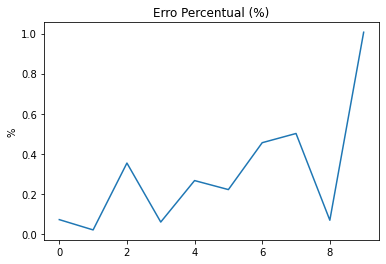

In [14]:
plt.title('Erro Percentual (%)')
plt.plot(erro_percentual)
plt.ylabel('%')